In [1]:
%run supportvectors-common.ipynb



<div style="color:#aaa;font-size:8pt">
<hr/>

 </blockquote>
 <hr/>
</div>



# Feature engineering for the River Dataset


## Load and describe the data

In [2]:
URL = 'https://raw.githubusercontent.com/supportvectors/ml-100/master/river.csv'
data = pd.read_csv(URL).dropna()
data.describe()

,x1,x2,t
count,6311.000000,6311.000000,6311.000000
mean,3.477977,2.811144,0.683093
std,2.016079,84.502360,0.465308
min,0.002324,-149.995478,0.000000
25%,1.723568,-69.039539,0.000000
50%,3.436070,4.819181,1.000000
75%,5.209477,76.604580,1.000000
max,6.999034,153.720038,1.000000


In [3]:
data.isnull().sum()

x1    0
x2    0
t     0
dtype: int64

## Split into test and training subsets

In [4]:
X, y = data[['x1','x2']], data['t'].astype('category')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, )

## Visualize the dataset

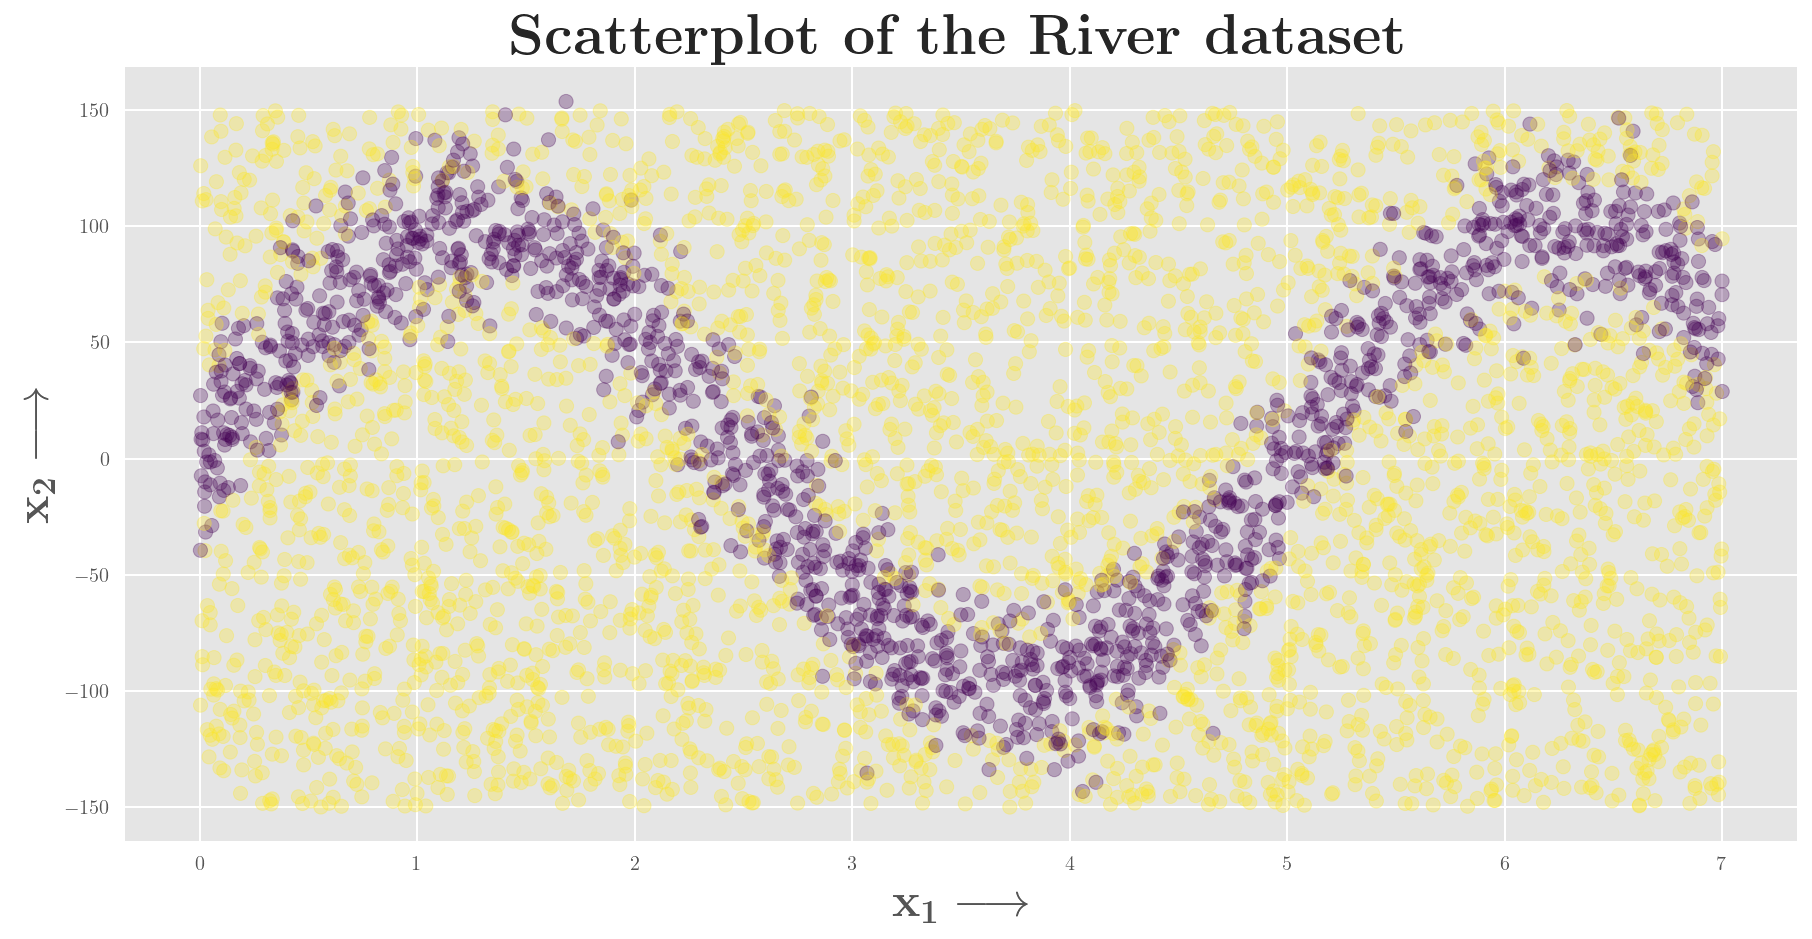

In [5]:
# enable LaTeX temporarily

rc ('font', family='serif')
rc ('text', usetex=True)
rc ('font', size=20)

plt.figure(figsize=(15,7))
plt.tight_layout(pad=1.08, h_pad=20, w_pad=20, rect=None)
plt.scatter(X_train['x1'], X_train['x2'], c=y_train, cmap="viridis", alpha=0.30,  s=50,)
plt.title(r'\textsc{\textbf {Scatterplot of the River dataset}}');
plt.xlabel(r'$\mathbf{x_1 \longrightarrow}$');
plt.ylabel(r'$\mathbf{x_2 \longrightarrow}$');



A few observations stand out from the visualization above:
    
* there seems to be two decision boundaries
* both these decision boundaries seem to be highly nonlinear

Therefore, this should warn us that a direct application of a linear classifier may not yield success. Let us, nonetheless, proceed and see if this does come out to be true.

## A Direct Application of Logistic Regression

To begin the modeling exercise, let us directly apply the logistic regression classifier. Recall that the equation for a logistic classifier is:


\begin{align}\label{eq:}
\log(\frac{p(\mathbf{x})}{1 - p(\mathbf{x})})
&=\beta_0 + \mathbf{\beta}\cdot\mathbf{x} \nonumber \\
 & = \text{distance from the decision boundary} \\  
\end{align}


### Build the direct model
Let us now build the logistic model from the training data.

In [6]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

### Check the goodness of fit of this model
Let us now look at the classification report and the confusion matrix

In [7]:
from sklearn.metrics import confusion_matrix             # confusion matrix
from sklearn.metrics import classification_report        # goodness of fit report
labels = clf.predict(X_test)
matrix = confusion_matrix (y_test, labels)

report = classification_report (y_test, labels)
print (matrix)
print (report)

[[   0  531]
 [   0 1047]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       531
         1.0       0.66      1.00      0.80      1047

    accuracy                           0.66      1578
   macro avg       0.33      0.50      0.40      1578
weighted avg       0.44      0.66      0.53      1578



## Polynomial in Logistic Regression

In [8]:
# Remember to disable it when you don't need it. Some plotting libraries throw up with this enabled.
rc ('text', usetex=False)

In [9]:

y_train_df = pd.DataFrame(y_train)
y_train_df.describe()

,t
count,4733.0
unique,2.0
top,1.0
freq,3264.0


In [10]:
degree      = 5
scaler      = StandardScaler()
polynomial  = PolynomialFeatures(degree)
polydata    = make_pipeline(scaler, polynomial)
X_polytrain = polydata.fit_transform(X_train)
model       = LogisticRegression()

# Fit the model to the data.
model.fit(X_polytrain, y_train)
print (f"The Model {model } \n has cofficients:\n{model.coef_}")

# Next, predict the labels for the test data.
X_polytest  = polydata.transform(X_test)
labels      = model.predict(X_polytest)

# Check how good are the predictions?
from sklearn.metrics import classification_report        # goodness of fit report
report = classification_report (y_test, labels)
print (report)

The Model LogisticRegression() 
 has cofficients:
[[ 0.30275844  0.22640205  2.89253328  0.54058973  2.4620252  -1.1321178
  -1.19850704 -8.31885989  0.00999976 -0.03493056  0.03875101 -1.83193462
   1.85581407  0.64112335  1.29934634  0.67822305  1.80056971 -0.34421408
  -0.56130695  0.02429766  0.02657552]]
              precision    recall  f1-score   support

         0.0       0.70      0.68      0.69       531
         1.0       0.84      0.85      0.85      1047

    accuracy                           0.79      1578
   macro avg       0.77      0.77      0.77      1578
weighted avg       0.79      0.79      0.79      1578



## A More Careful Analysis With Feature Engineering

Let us first extract the river from the data

In [11]:
river = data.copy()[data.t ==0]
river.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
x1,2000.0,3.455327,2.005875,0.002324,1.747865,3.384076,5.169797,6.999034
x2,2000.0,18.422221,72.841029,-149.728285,-47.627295,35.000755,81.276203,153.720038
t,2000.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Plot the river

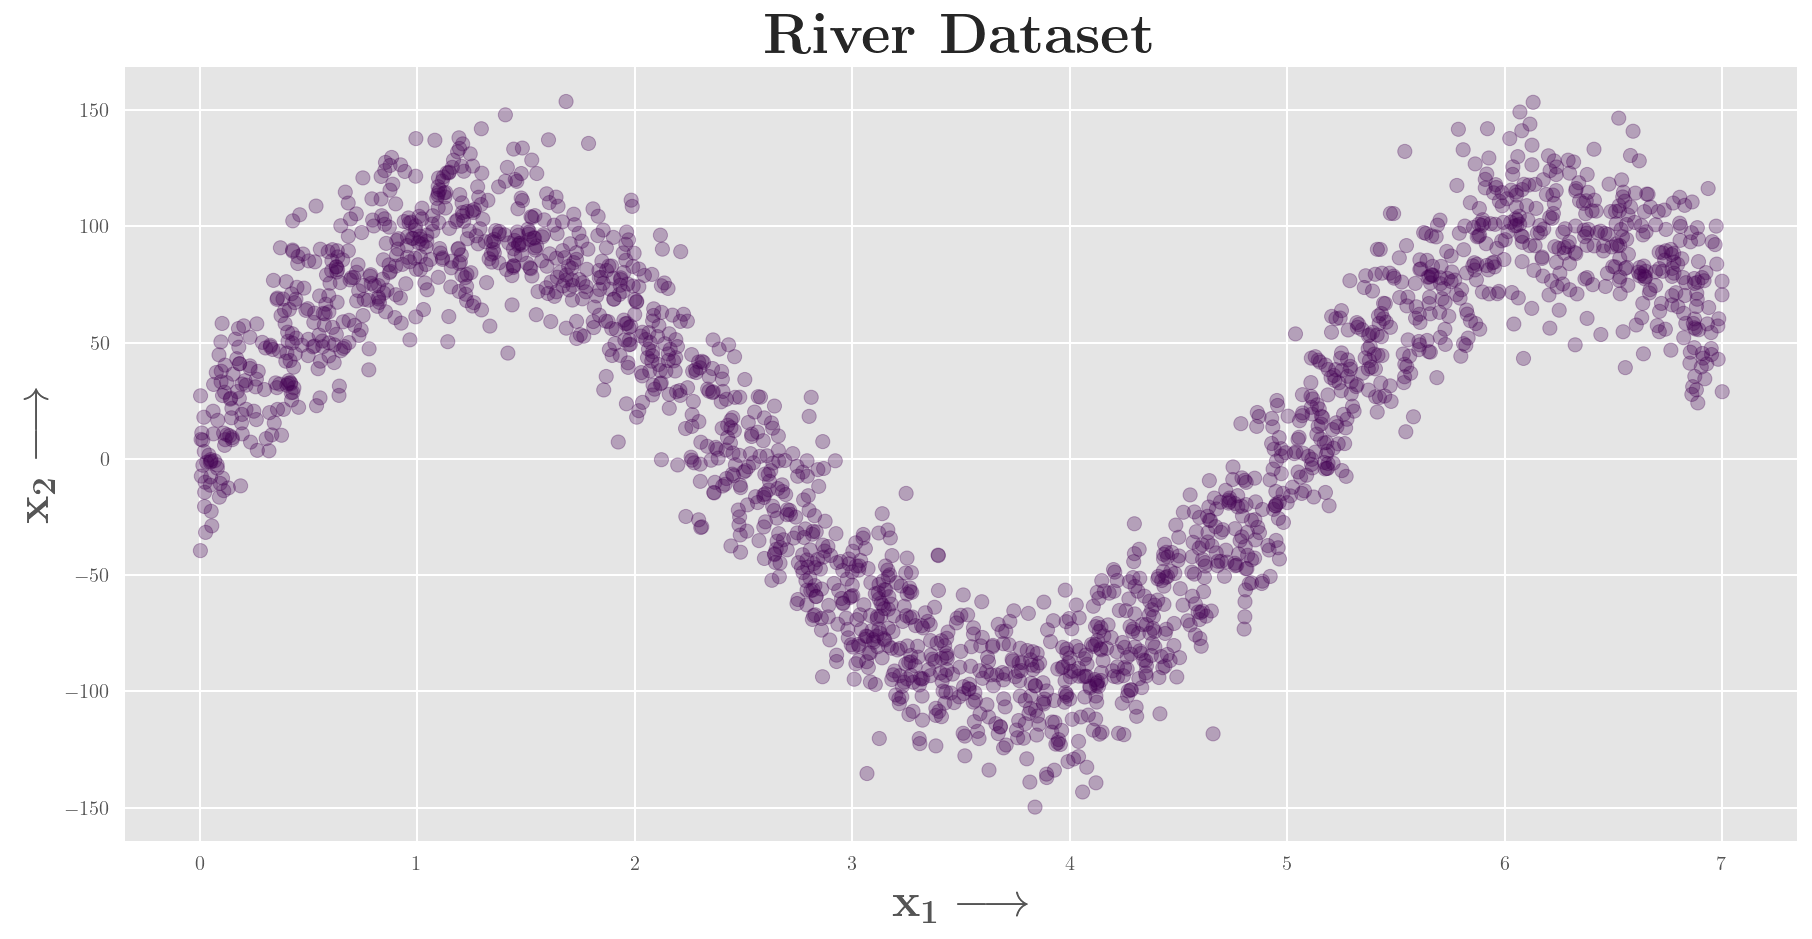

In [12]:
rc ('font', family='serif')
rc ('text', usetex=True)
rc ('font', size=20)

plt.figure(figsize=(15,7))
plt.scatter(river.x1, river.x2, c=river.t, cmap="viridis", alpha=0.30,  s=50,)
plt.title(r'\textsc{\textbf {River Dataset}}');
plt.xlabel(r'$\mathbf{x_1 \longrightarrow}$');
plt.ylabel(r'$\mathbf{x_2 \longrightarrow}$');


### Model the river with polynomial-regression

In [13]:
X_reg, y_reg = river[['x1']], river['x2']
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, random_state=42, )
#plt.scatter(X_reg_train.x1.values, y_reg_train)

### Let us make a pipeline

In [14]:
degree      = 5
scaler      = StandardScaler()
polynomial  = PolynomialFeatures(degree)
polydata    = make_pipeline(scaler, polynomial)
X_polytrain = polydata.fit_transform(X_reg_train)
model       = LinearRegression()

# Fit the model to the data.
model.fit(X_polytrain, y_reg_train)
print (f"The Model {model } \n has cofficients:\n{model.coef_}")

# Next, predict the labels for the test data.
X_polytest  = polydata.transform(X_reg_test)
labels      = model.predict(X_polytest)

# Check how good are the predictions?
mse         = mean_squared_error(y_reg_test, labels)
print(f"Mean squared error: {mse:.2f}")
r2 = r2_score(y_reg_test, labels)
print(rf"Coefficient of Determination (R^2):{r2:0.4f}")


The Model LinearRegression() 
 has cofficients:
[  0.         -85.27748081 211.67963168  75.4649456  -61.35988128
 -13.36254608]
Mean squared error: 519.64
Coefficient of Determination (R^2):0.9077


### Goodness of model diagnostics
Let us now see if the diagnostics on the model are indicating a good model

### Residuals Check
Let us plot the residuals to see if we have homoscedasticity

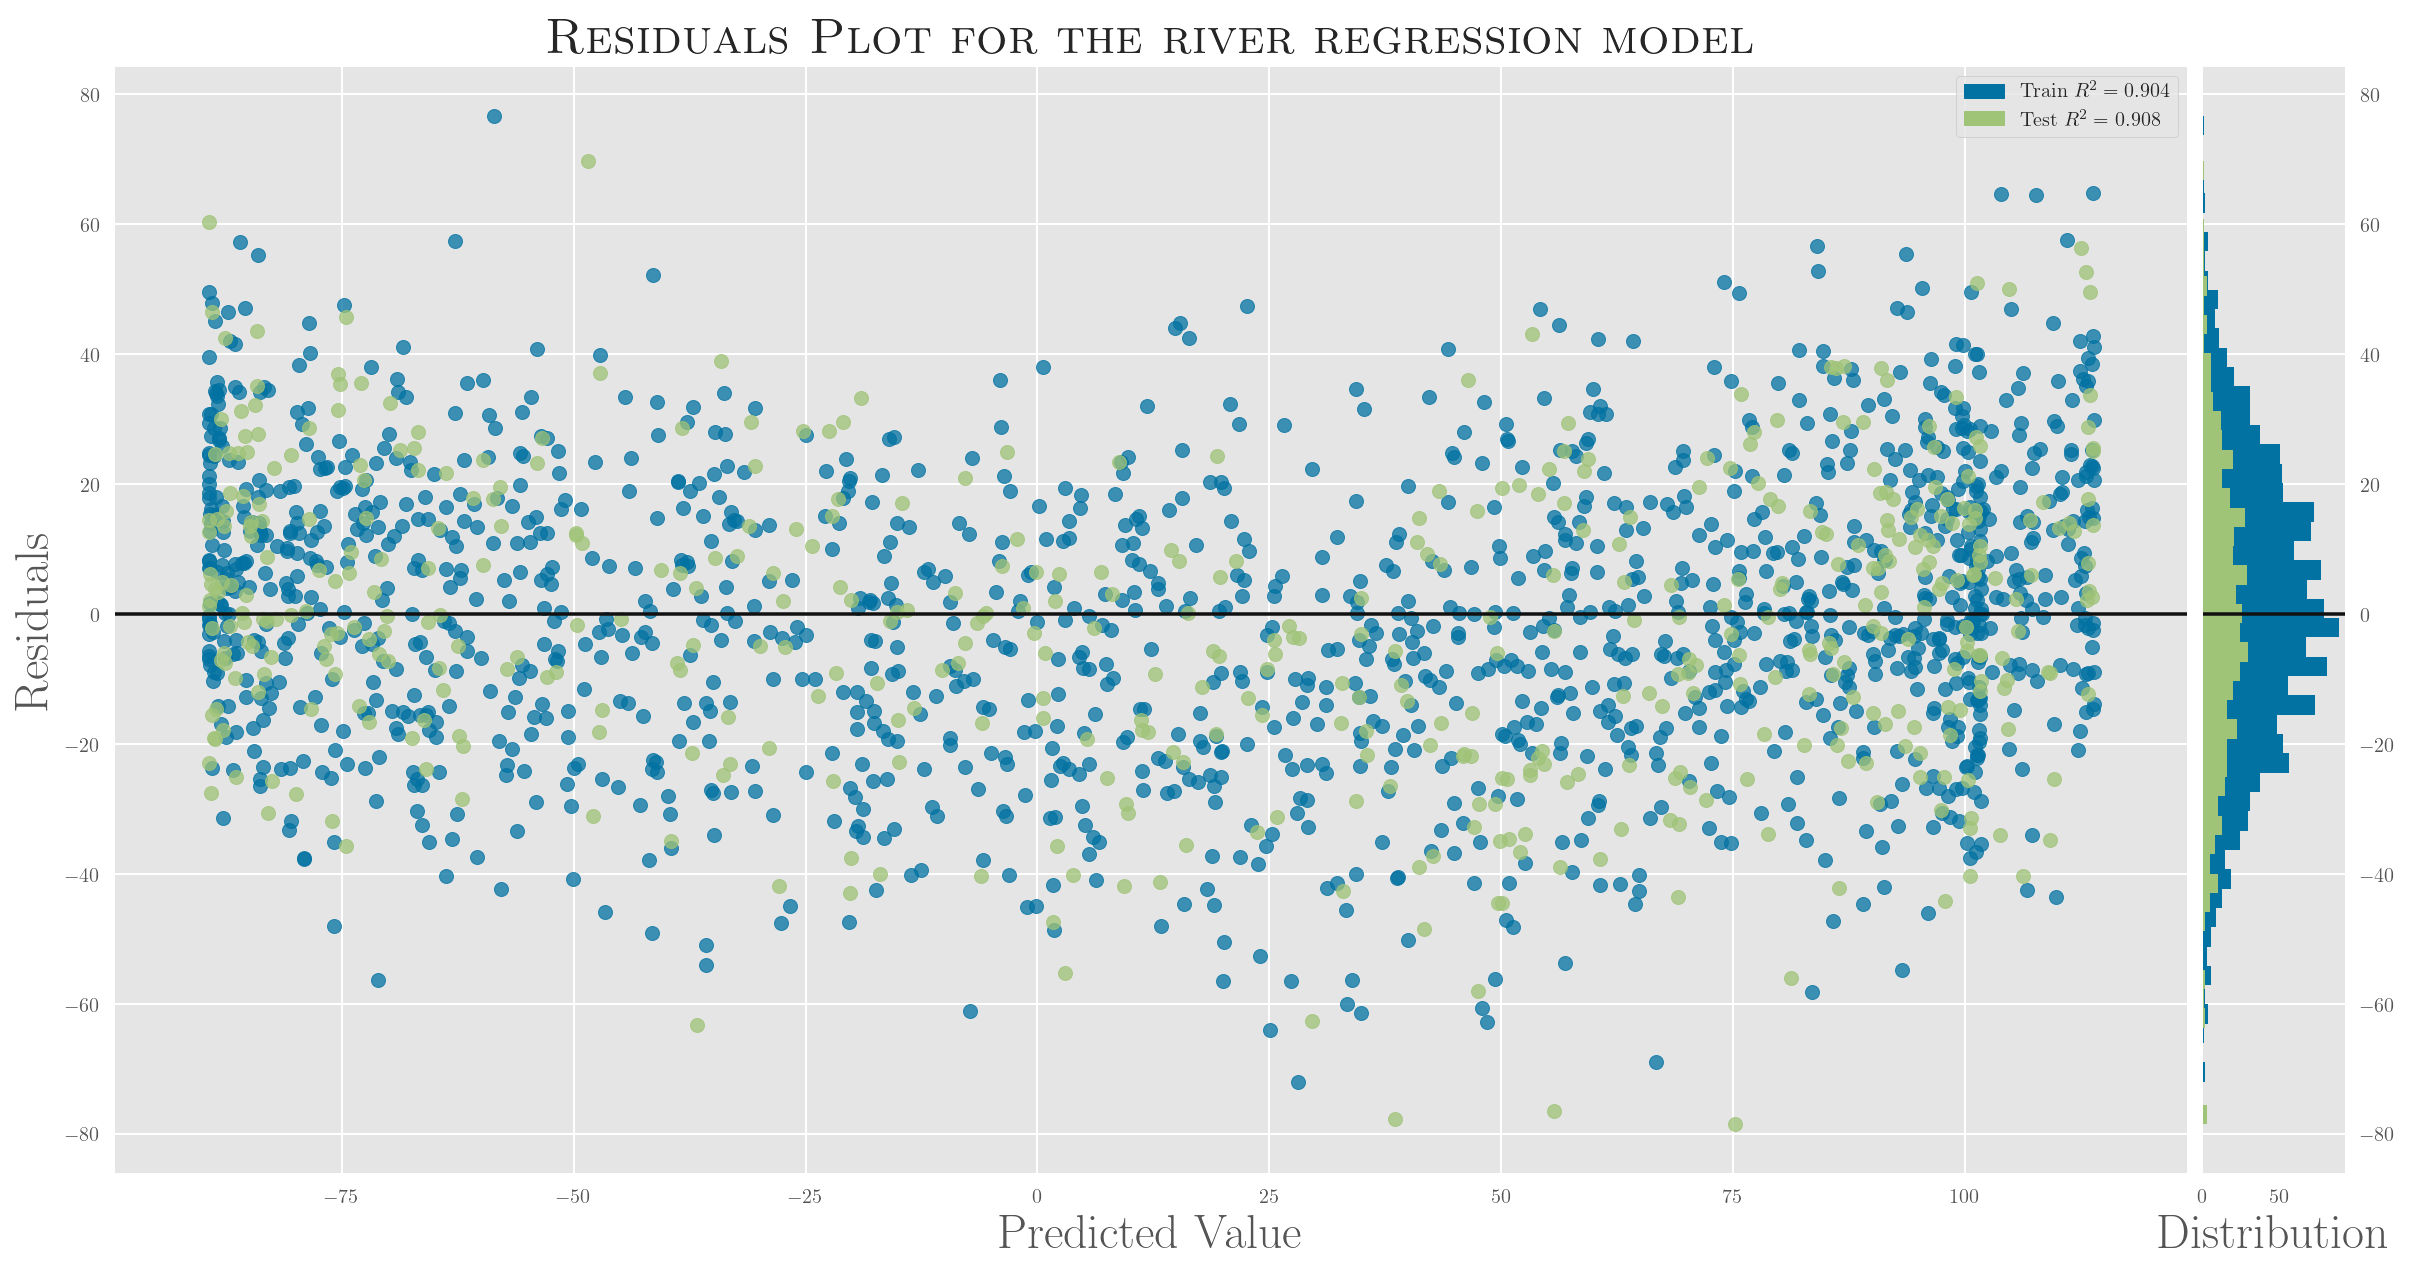

In [15]:
from yellowbrick.regressor import residuals_plot
plt.rcParams[ 'figure.figsize' ] = '20,10'               # landscape format figures
viz = residuals_plot(model, X_polytrain, y_reg_train, X_polytest, y_reg_test, 
                     title=r'\textsc{\Huge Residuals Plot for the river regression model}')

### Prediction Errors Plot

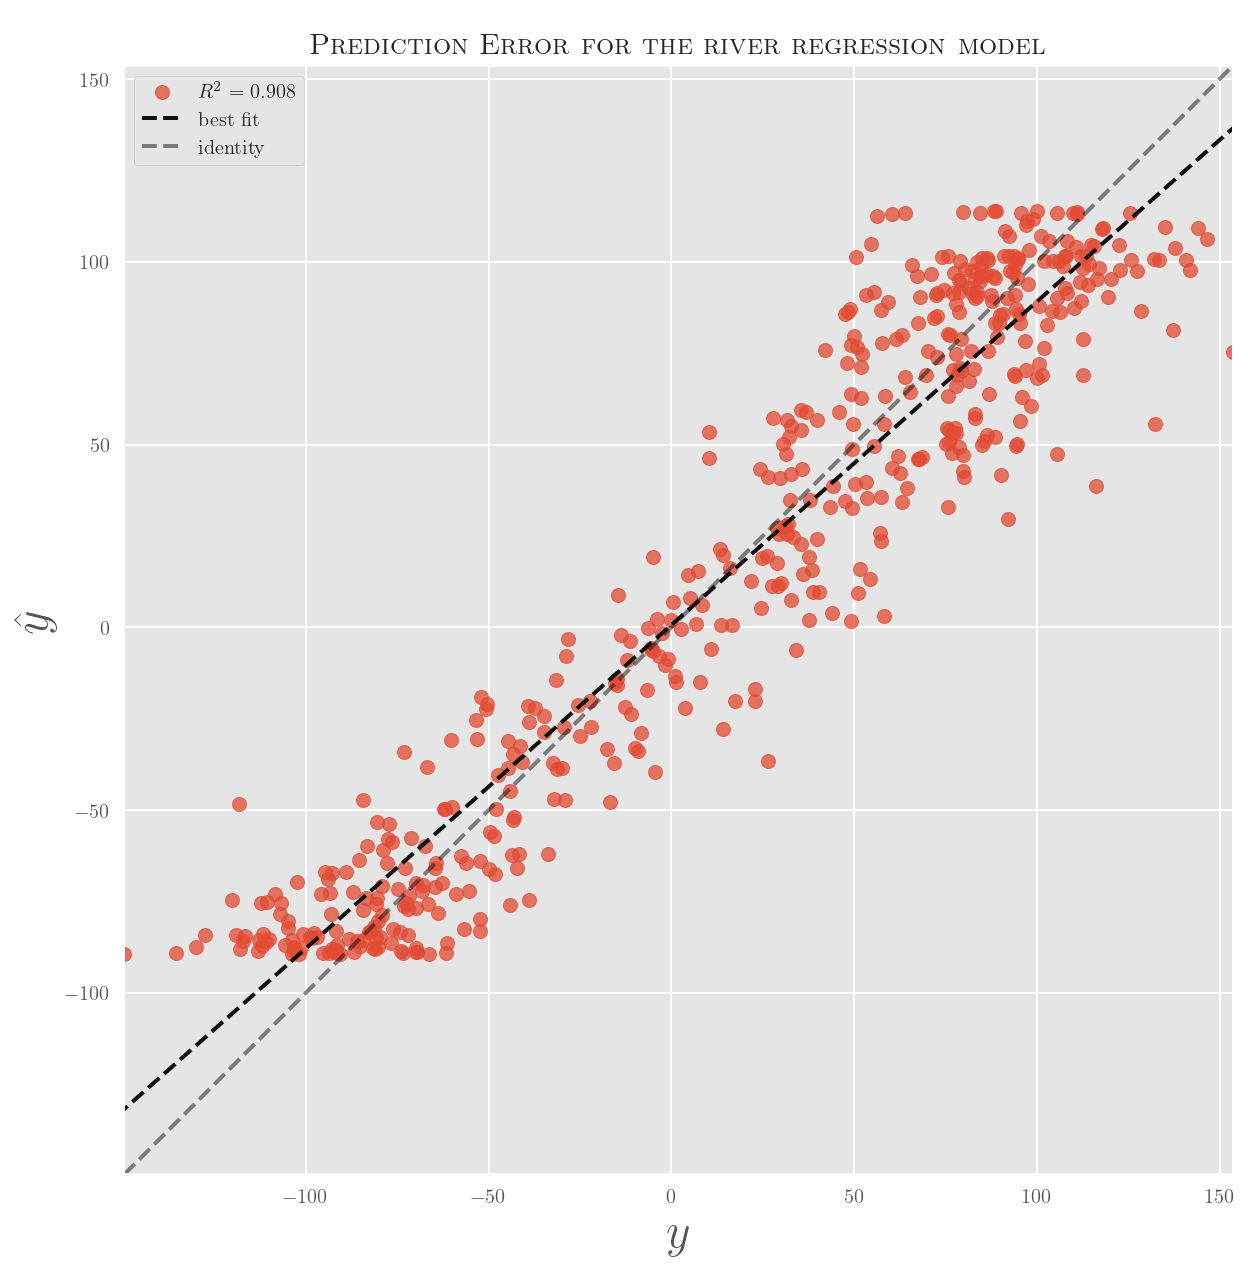

In [16]:
from yellowbrick.regressor import prediction_error

visualizer = prediction_error(model, X_polytrain, y_reg_train, X_polytest, y_reg_test,
                             title=r'\textsc{\Large Prediction Error for the river regression model}',
                             xlabel=r'$\mathbf{y}$', ylabel=r'$\mathbf{\hat{y}}$')

### Cook's Distance to see point of high influence (leverage)

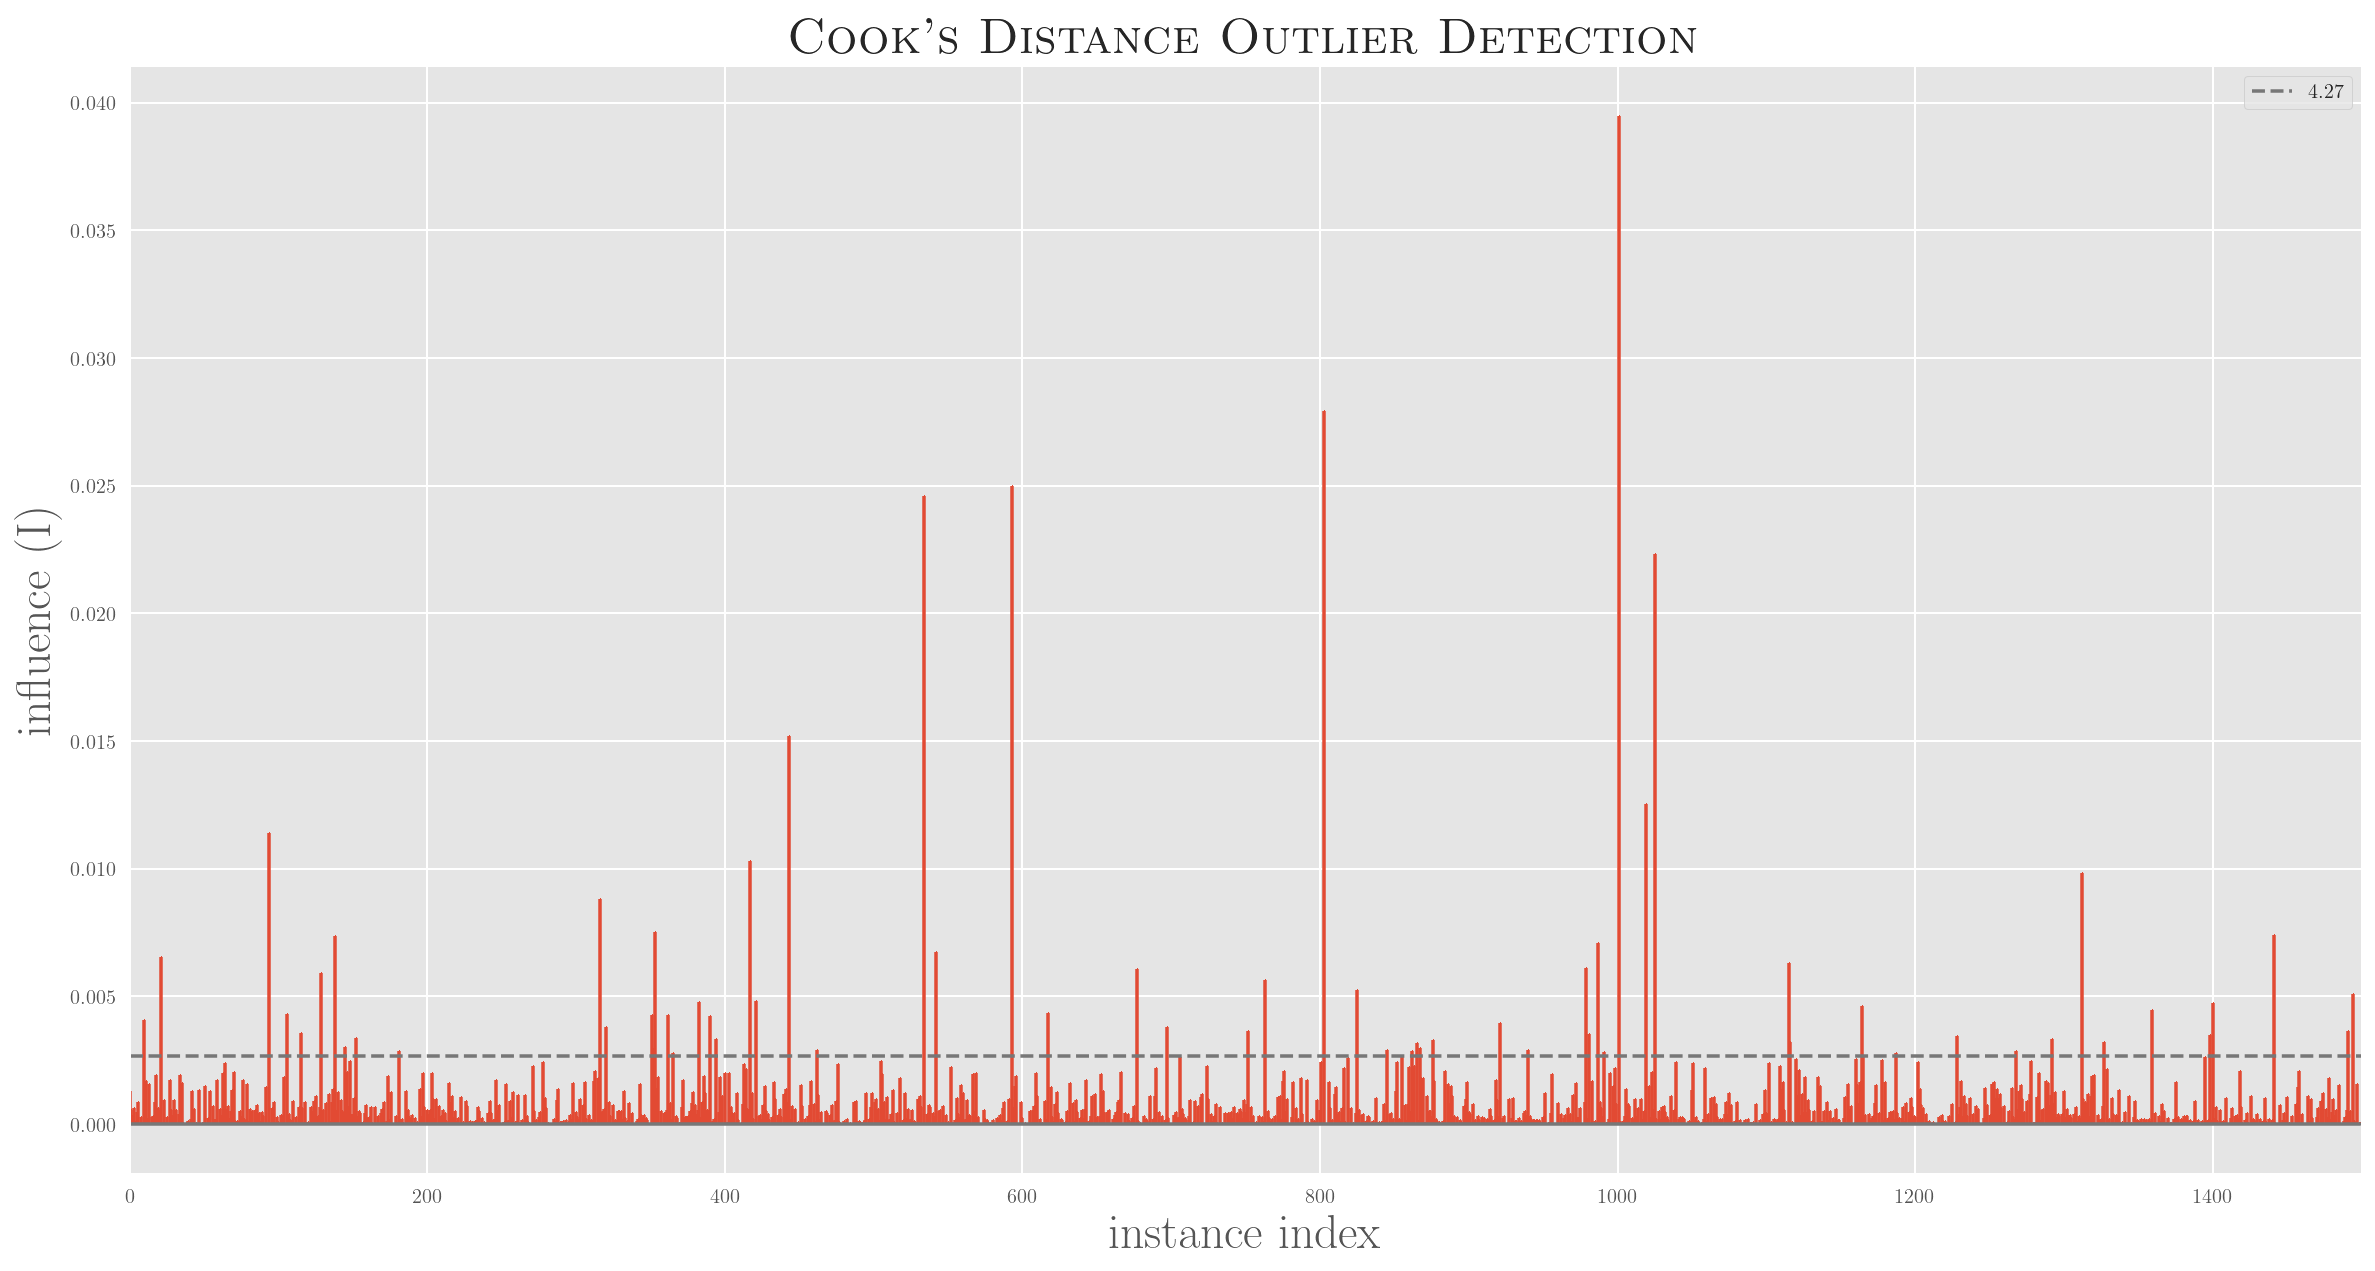

CooksDistance(ax=<Axes: title={'center': "\\textsc{\\Huge Cook's Distance Outlier Detection}"}, xlabel='instance index', ylabel='influence (I)'>)

In [17]:
from yellowbrick.regressor import cooks_distance
cooks_distance(
    X_polytrain, y_reg_train,
    draw_threshold=True,
    linefmt="C0-", markerfmt=",",
    title=r"\textsc{\Huge Cook's Distance Outlier Detection}"
    
)

### Visualize the Regression Model over the data
Now that we have established that the model looks good, let us visualize its predictions to see how well it looks in reality.

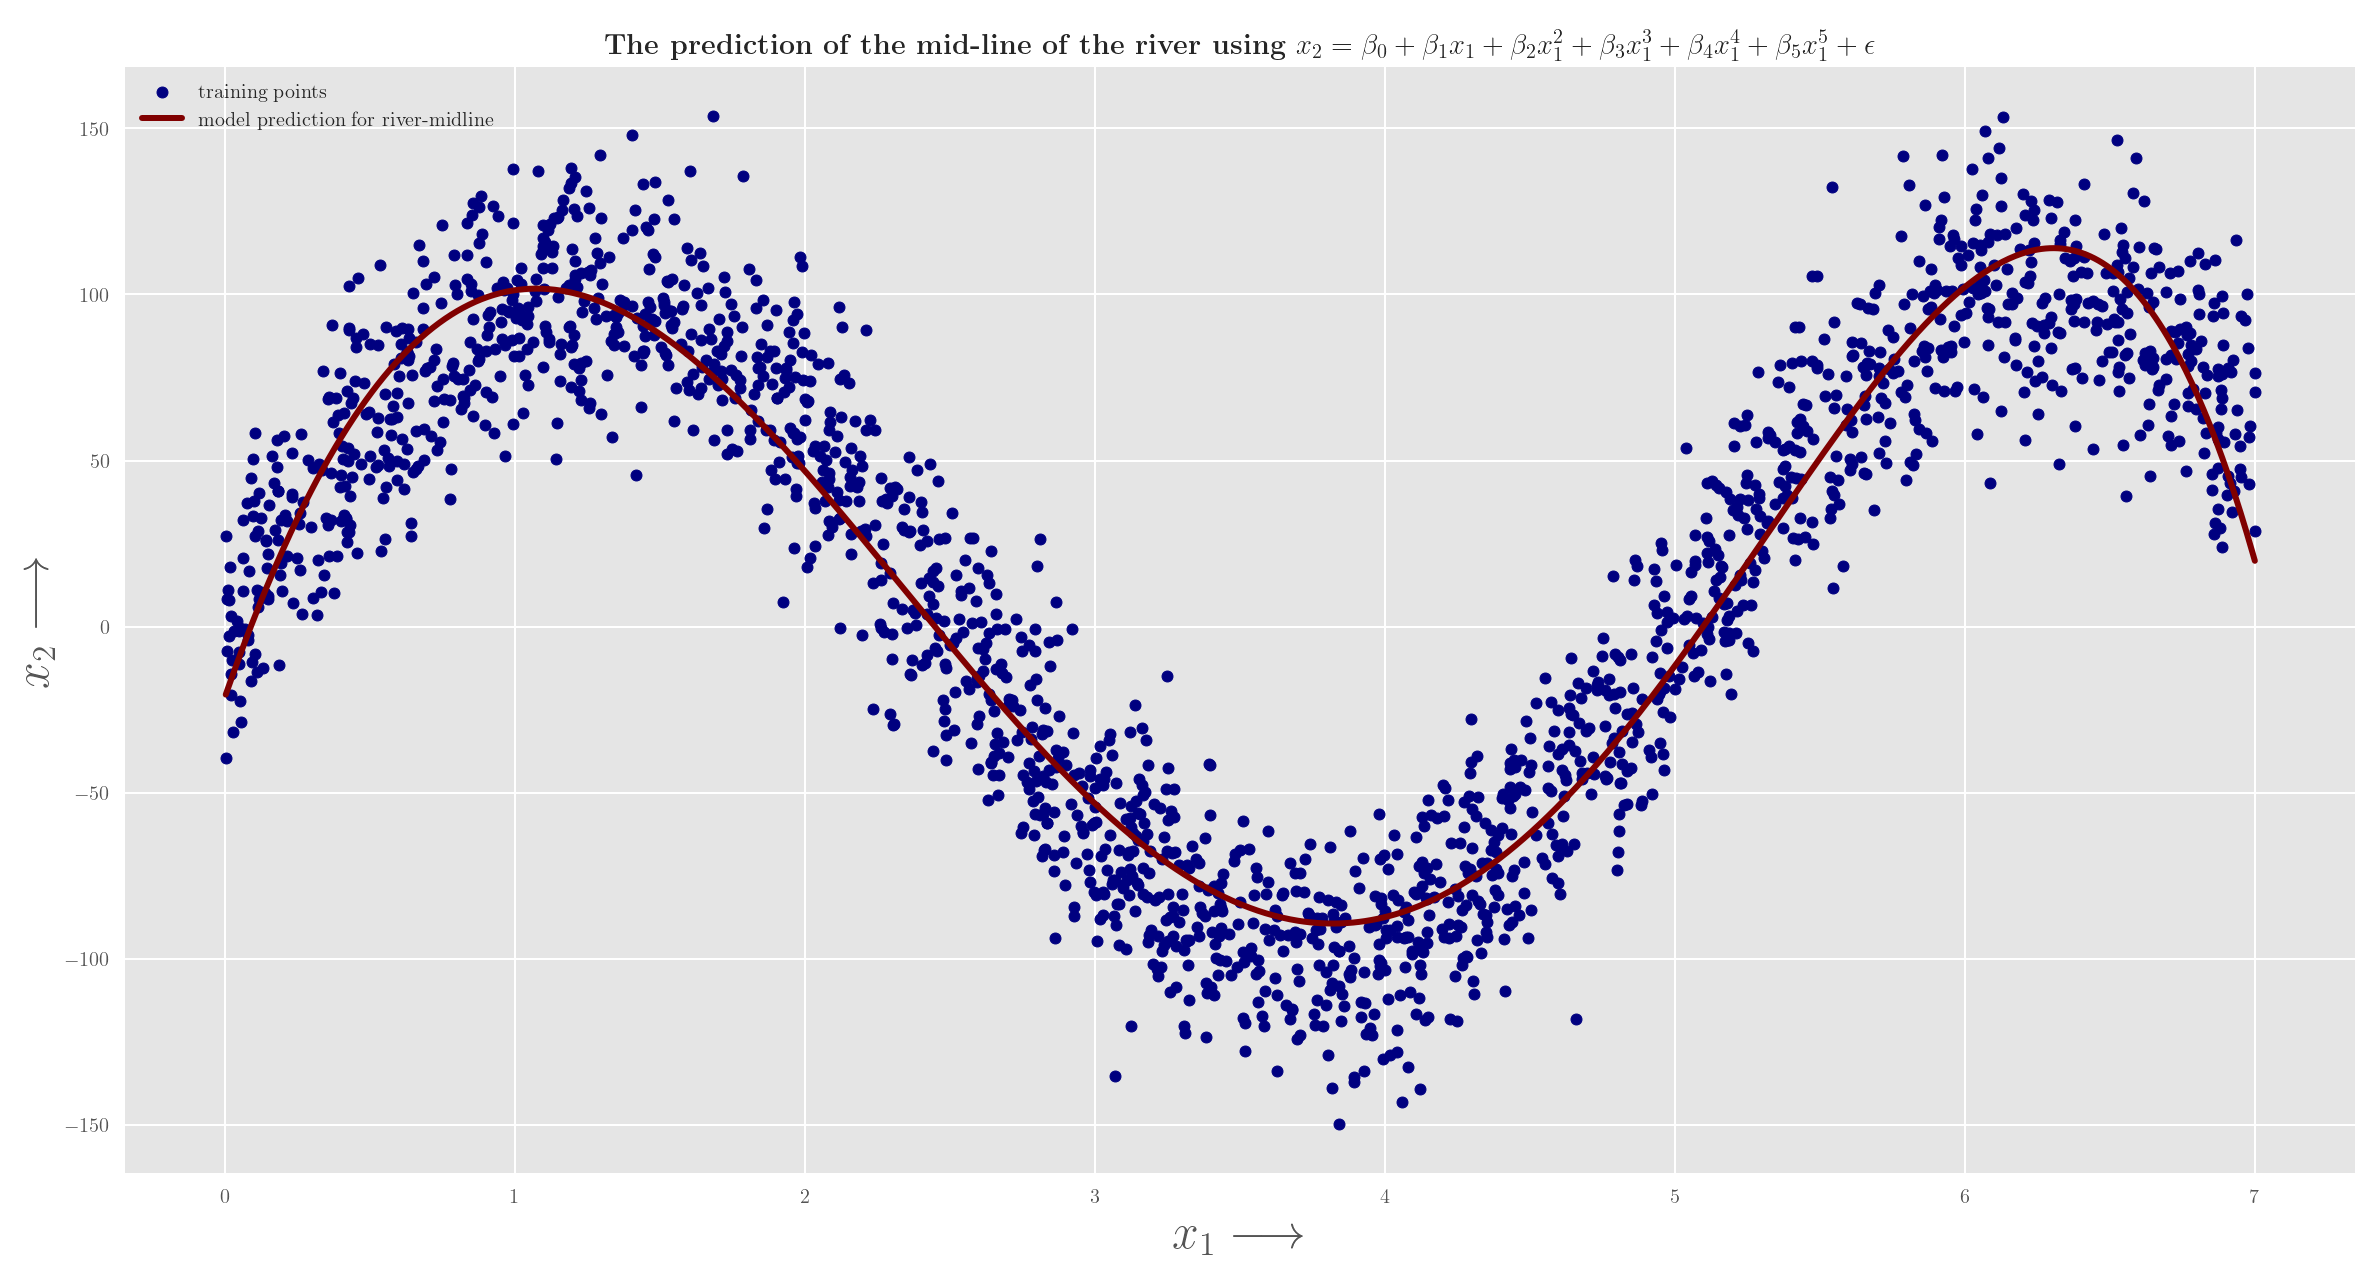

In [18]:
rc ('font', family='serif')
rc ('text', usetex=True)
rc ('font', size=20)


# To visualize this, let us create sample data in the range.
x_min = X_reg[['x1']].min()
x_max = X_reg[['x1']].max()
x_plot = np.linspace(x_min, x_max, 1000)
#X_plot = x_plot[:, np.newaxis] # matrix-version

XX = polydata.transform(x_plot)
yy = model.predict(XX)

fig, ax = plt.subplots(figsize=(20,10))
lw=3
ax.scatter(X_reg.x1, y_reg, color='navy', s=30, marker='o', label="training points")
ax.plot(x_plot, yy, color='maroon', linewidth=lw,
             label="model prediction for river-midline")
plt.xlabel(r'$x_1 \longrightarrow$')
plt.ylabel (r'$x_2 \longrightarrow$')
plt.title(r' \textbf{\Large The prediction of the mid-line of the river using  $x_2 = \beta_0 + \beta_1 x_1 + \beta_2 x_1^2 + \beta_3 x_1^3 + \beta_4 x_1^4 + \beta_5 x_1^5 + \epsilon$ }')
ax.legend(loc='best');


### Now, extract the features!

We now realize that the only feature we need is the distance from the center of the river!


In [19]:
river_middle = model.predict(polydata.transform(data[['x1']]))
data['d'] = np.abs(data.x2 - river_middle)
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
x1,6311.0,3.477977,2.016079,0.002324,1.723568,3.436070,5.209477,6.999034
x2,6311.0,2.811144,84.502360,-149.995478,-69.039539,4.819181,76.604580,153.720038
t,6311.0,0.683093,0.465308,0.000000,0.000000,1.000000,1.000000,1.000000
d,6311.0,77.946348,64.853703,0.045177,23.548933,58.550902,123.078721,259.614446


In [20]:
X = data[['d']]
y =  data['t'].astype('category')
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
d,6311.0,77.946348,64.853703,0.045177,23.548933,58.550902,123.078721,259.614446


In [21]:
y.describe()

count     6311.0
unique       2.0
top          1.0
freq      4311.0
Name: t, dtype: float64

In [22]:

X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(X, y, random_state=42, )

### Build and predict with the feature-extracted model

In [23]:
clf = LogisticRegression(solver='newton-cg')
clf.fit(X_clf_train, y_clf_train)

LogisticRegression(solver='newton-cg')

In [24]:
y_clf_pred = clf.predict(X_clf_test)
print (f"shape of y_pred: {y_clf_pred.shape}, shape of y_test: {y_test.shape}")

shape of y_pred: (1578,), shape of y_test: (1578,)


### Model Diagnostics

Let us first start with the confusion matrix to see how well we did.

#### Confusion Matrix

In [25]:
confmatrix = confusion_matrix(y_clf_test, y_clf_pred)
print(confmatrix)

[[439  92]
 [ 77 970]]


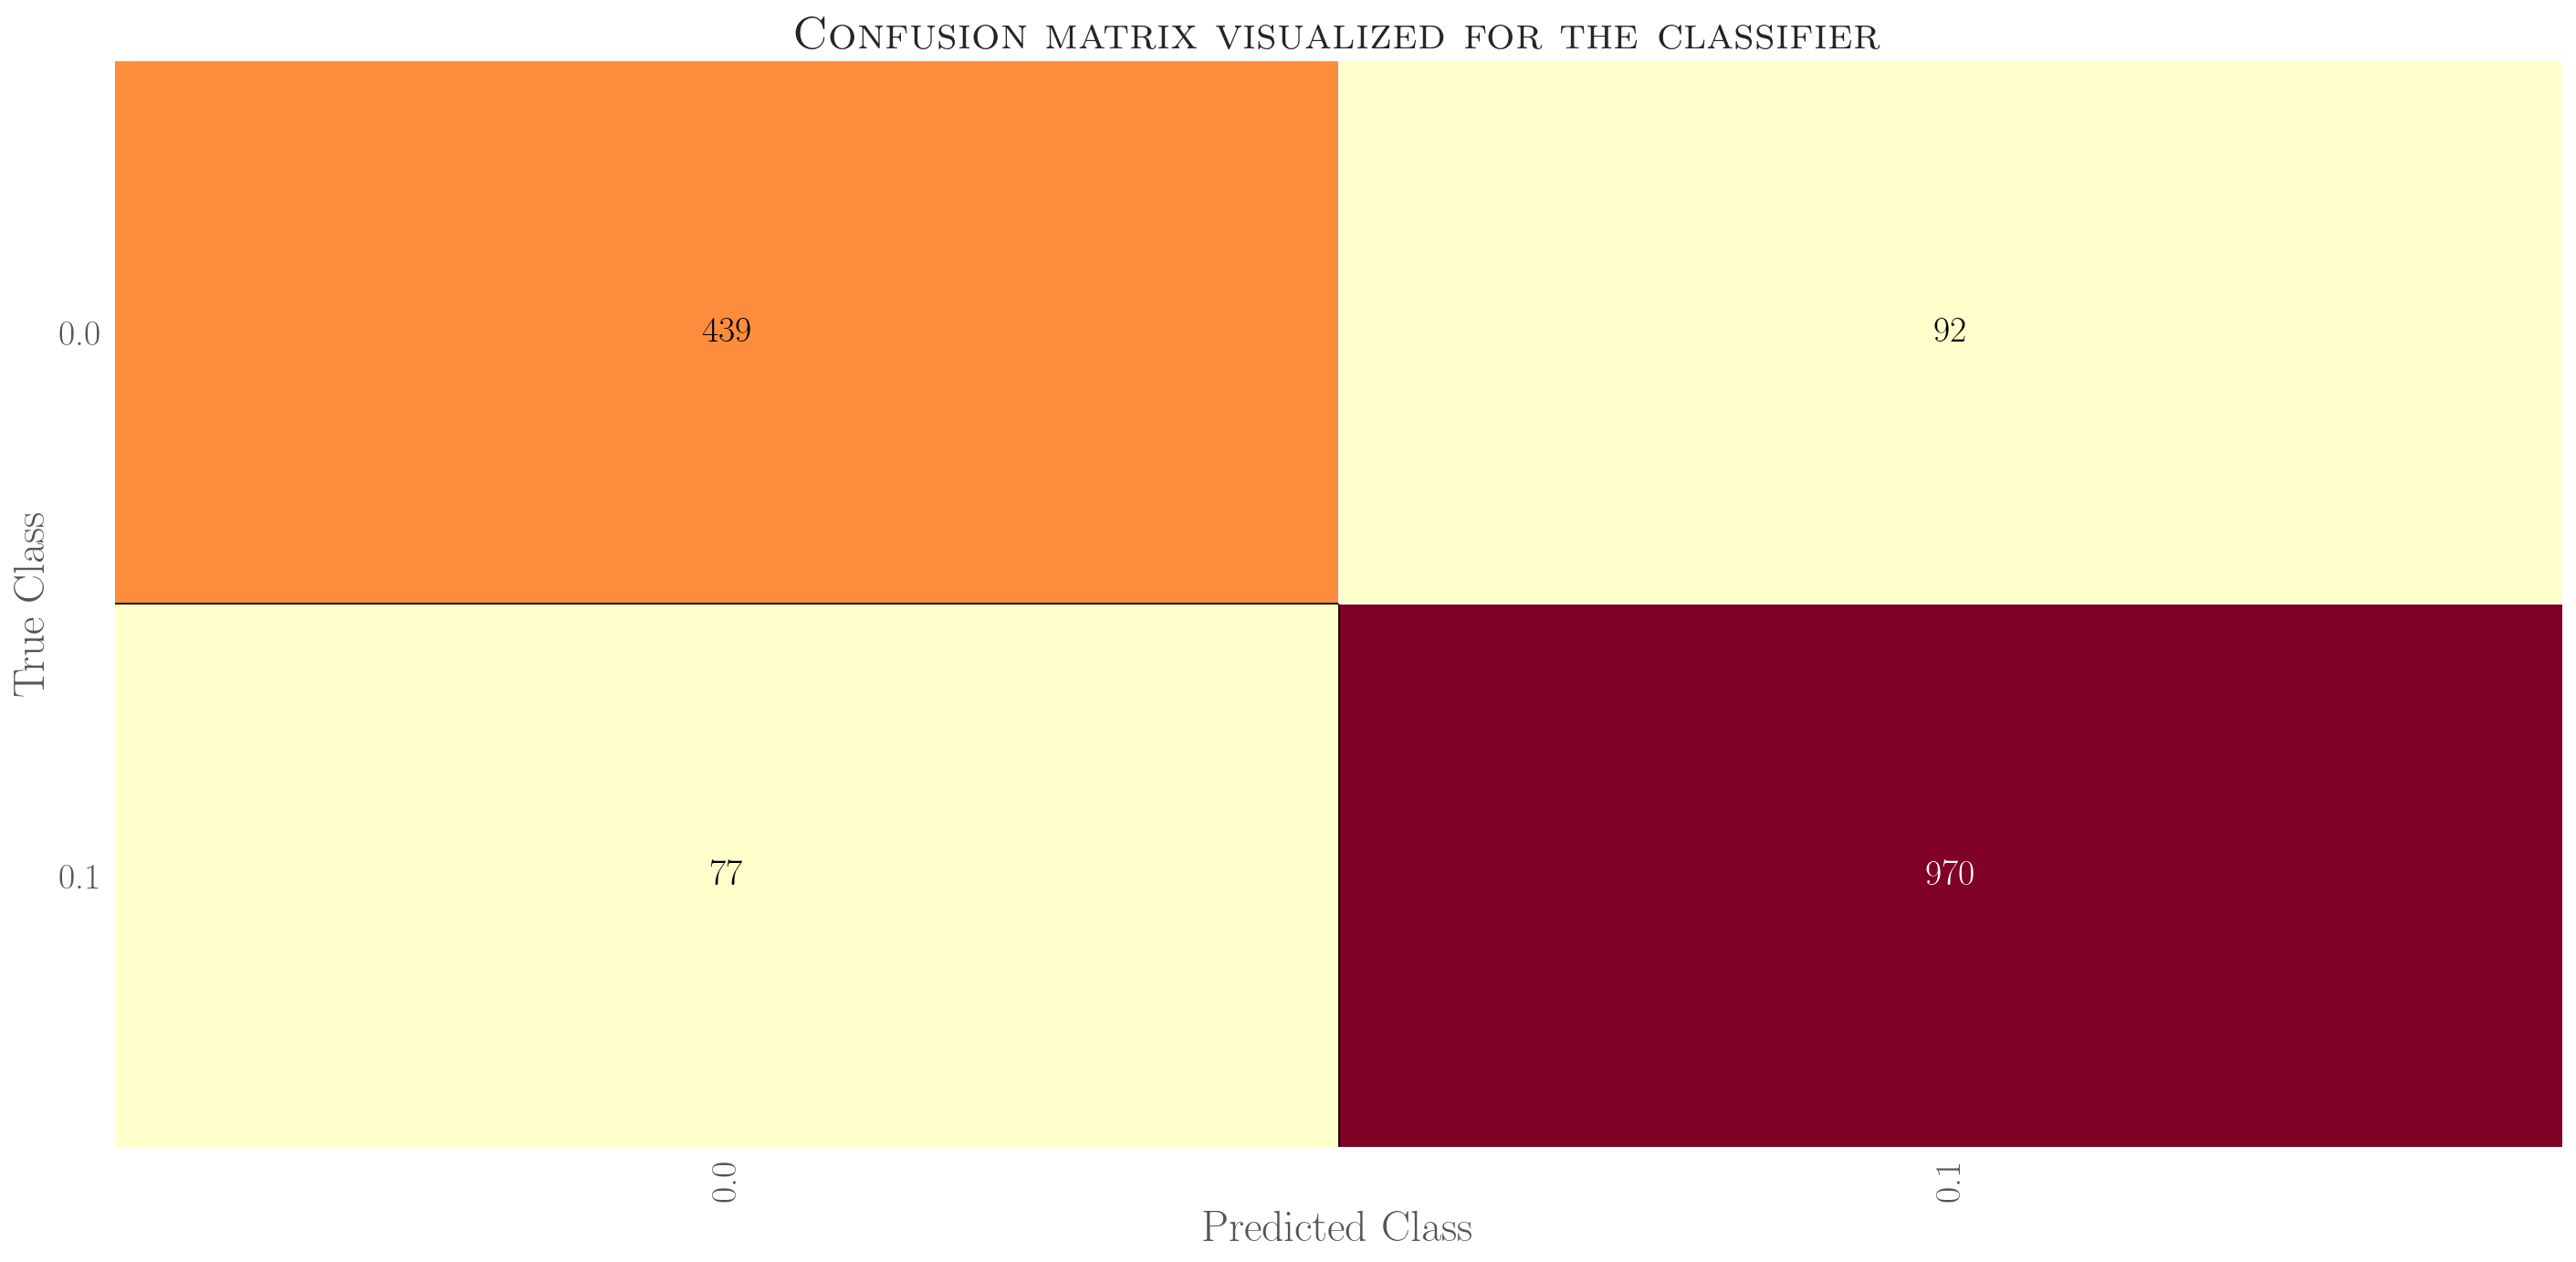

ConfusionMatrix(ax=<Axes: title={'center': '\\textsc{\\Huge Confusion matrix visualized for the classifier}'}, xlabel='Predicted Class', ylabel='True Class'>,
                classes=['0.0', '0.1'],
                cmap=<matplotlib.colors.ListedColormap object at 0x7fc4a3998610>,
                estimator=LogisticRegression(solver='newton-cg'))

In [26]:
from yellowbrick.classifier import confusion_matrix

confusion_matrix (clf, X_clf_train, y_clf_train, X_clf_test, y_clf_test, classes=['0.0', '0.1'],
     title=r'\textsc{\Huge Confusion matrix visualized for the classifier}')

#### Classification Report

In [27]:
report = classification_report (y_clf_test, y_clf_pred)
print (report)


              precision    recall  f1-score   support

         0.0       0.85      0.83      0.84       531
         1.0       0.91      0.93      0.92      1047

    accuracy                           0.89      1578
   macro avg       0.88      0.88      0.88      1578
weighted avg       0.89      0.89      0.89      1578



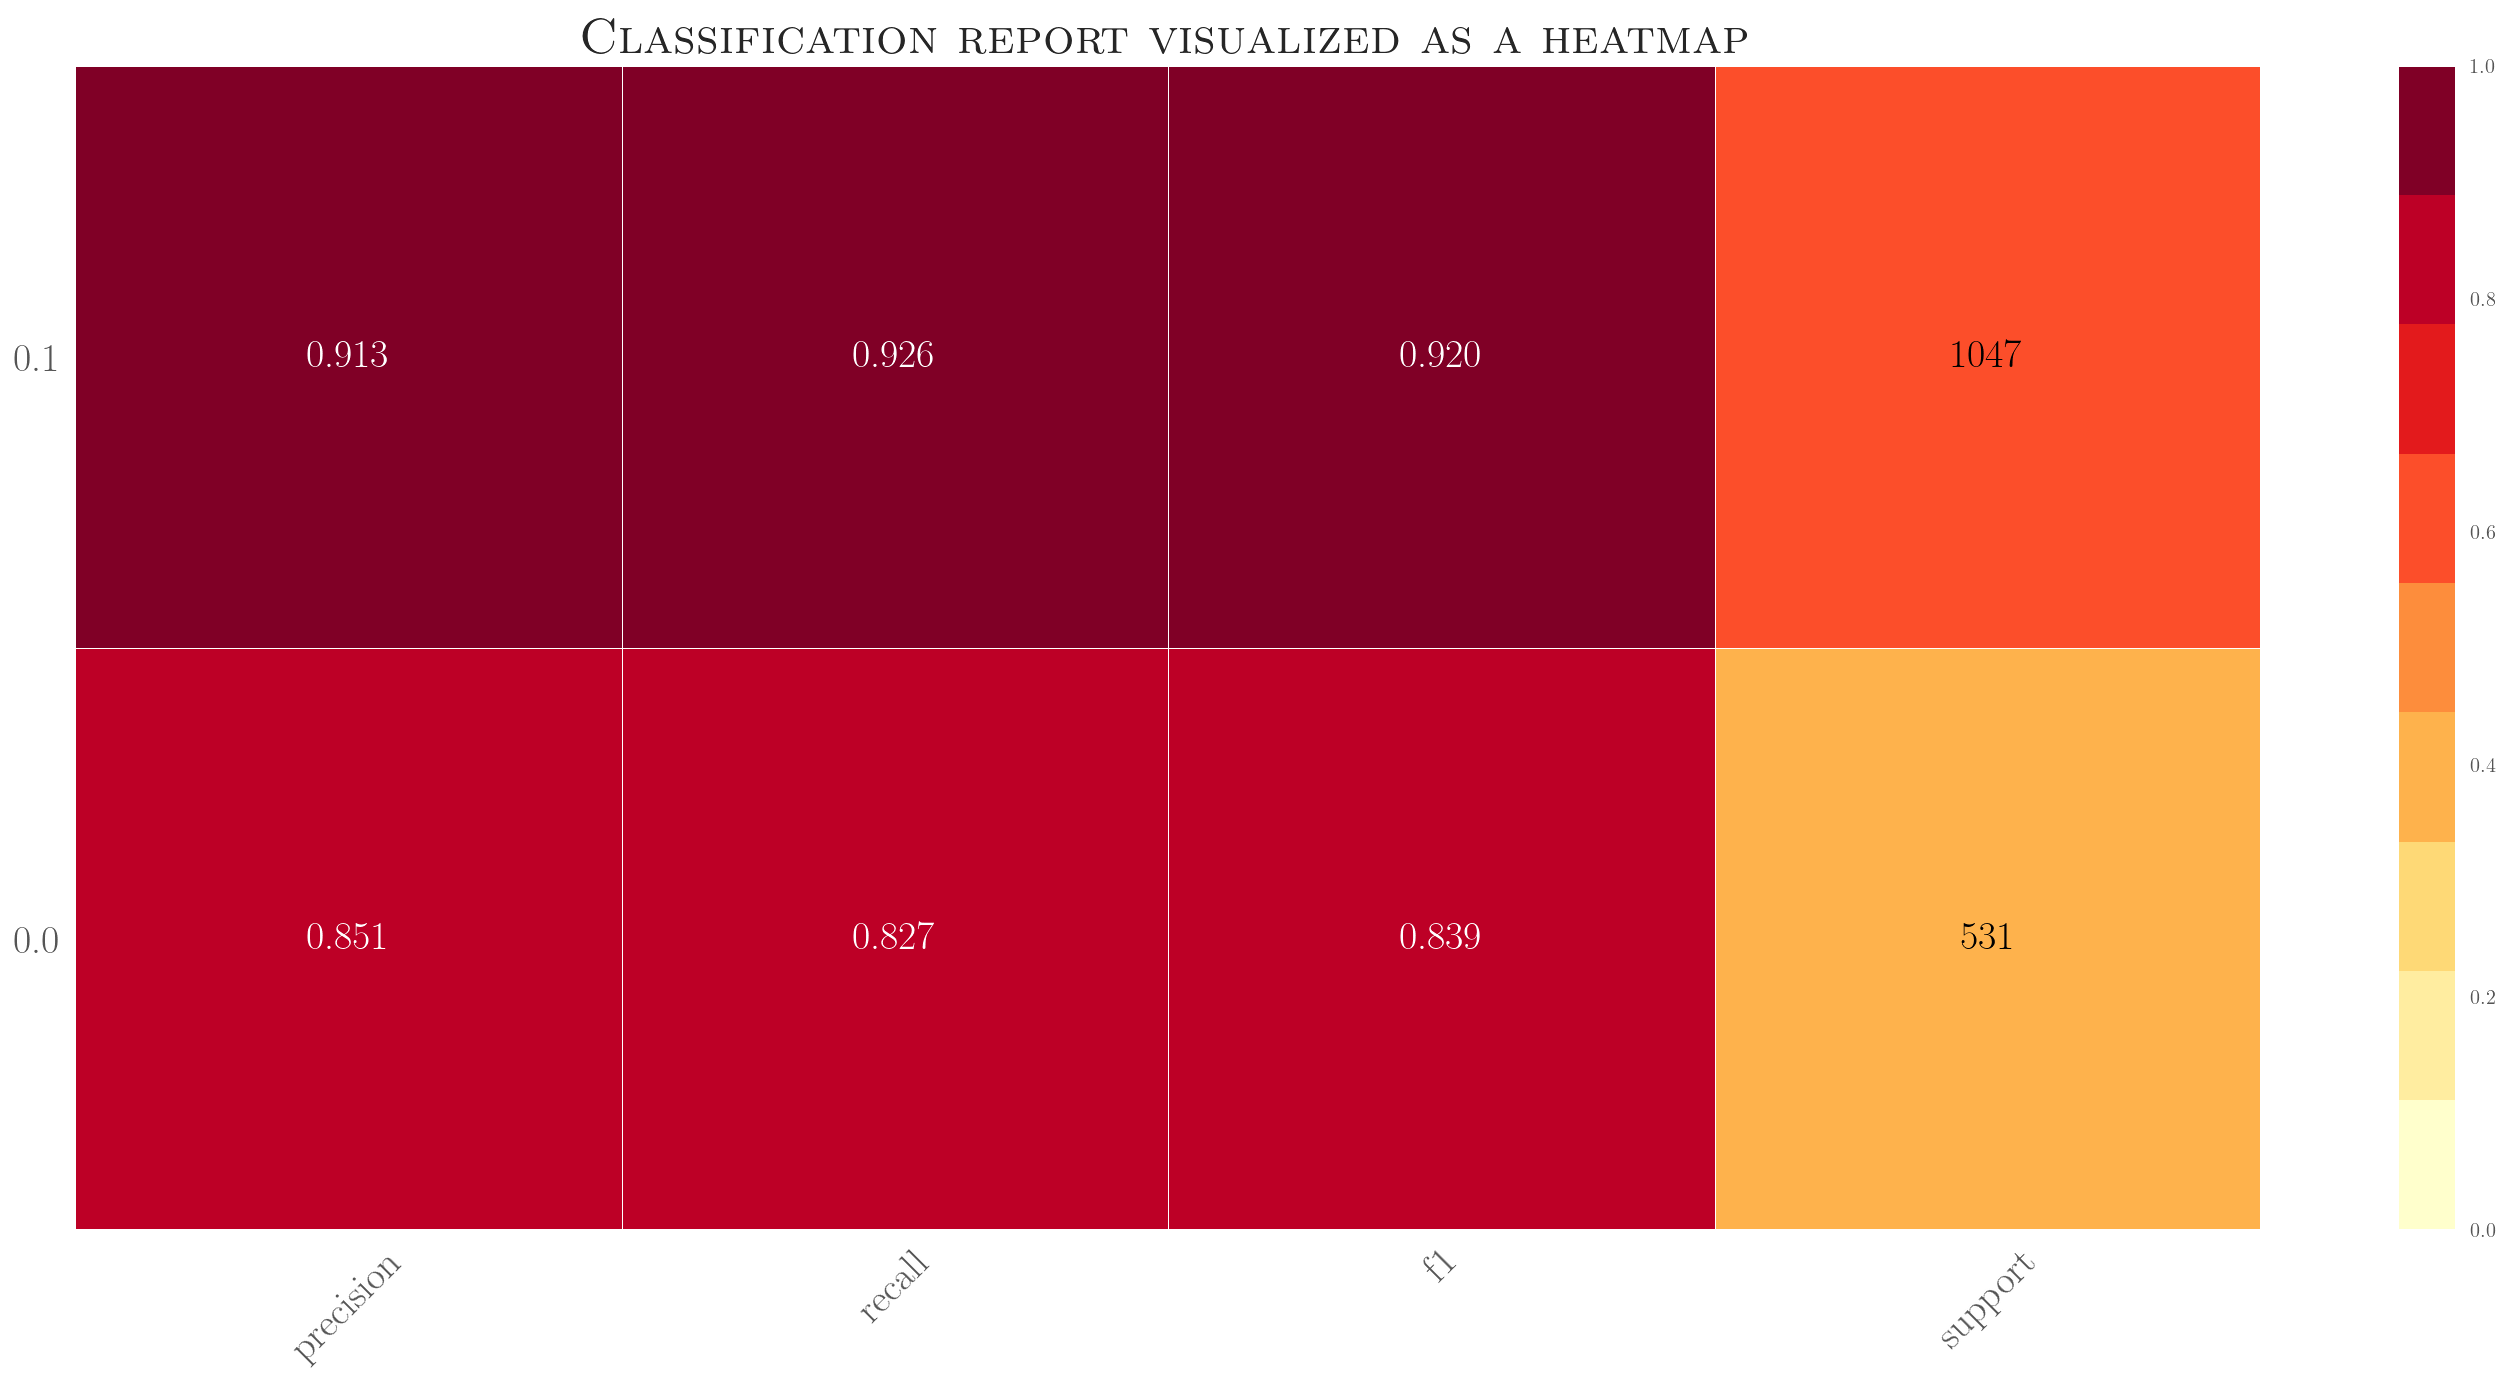

ClassificationReport(ax=<Axes: title={'center': '\\textsc{\\Huge Classification report visualized as a heatmap}'}>,
                     classes=[0.0, 0.1],
                     cmap=<matplotlib.colors.ListedColormap object at 0x7fc4a2e4d0f0>,
                     estimator=LogisticRegression(solver='newton-cg'),
                     support=True)

In [28]:
from yellowbrick.classifier import classification_report
classification_report(
    clf, X_clf_train, y_clf_train, X_clf_test, y_clf_test, classes=[0.0, 0.1], support=True,
    title=r'\textsc{\Huge Classification report visualized as a heatmap}'
)

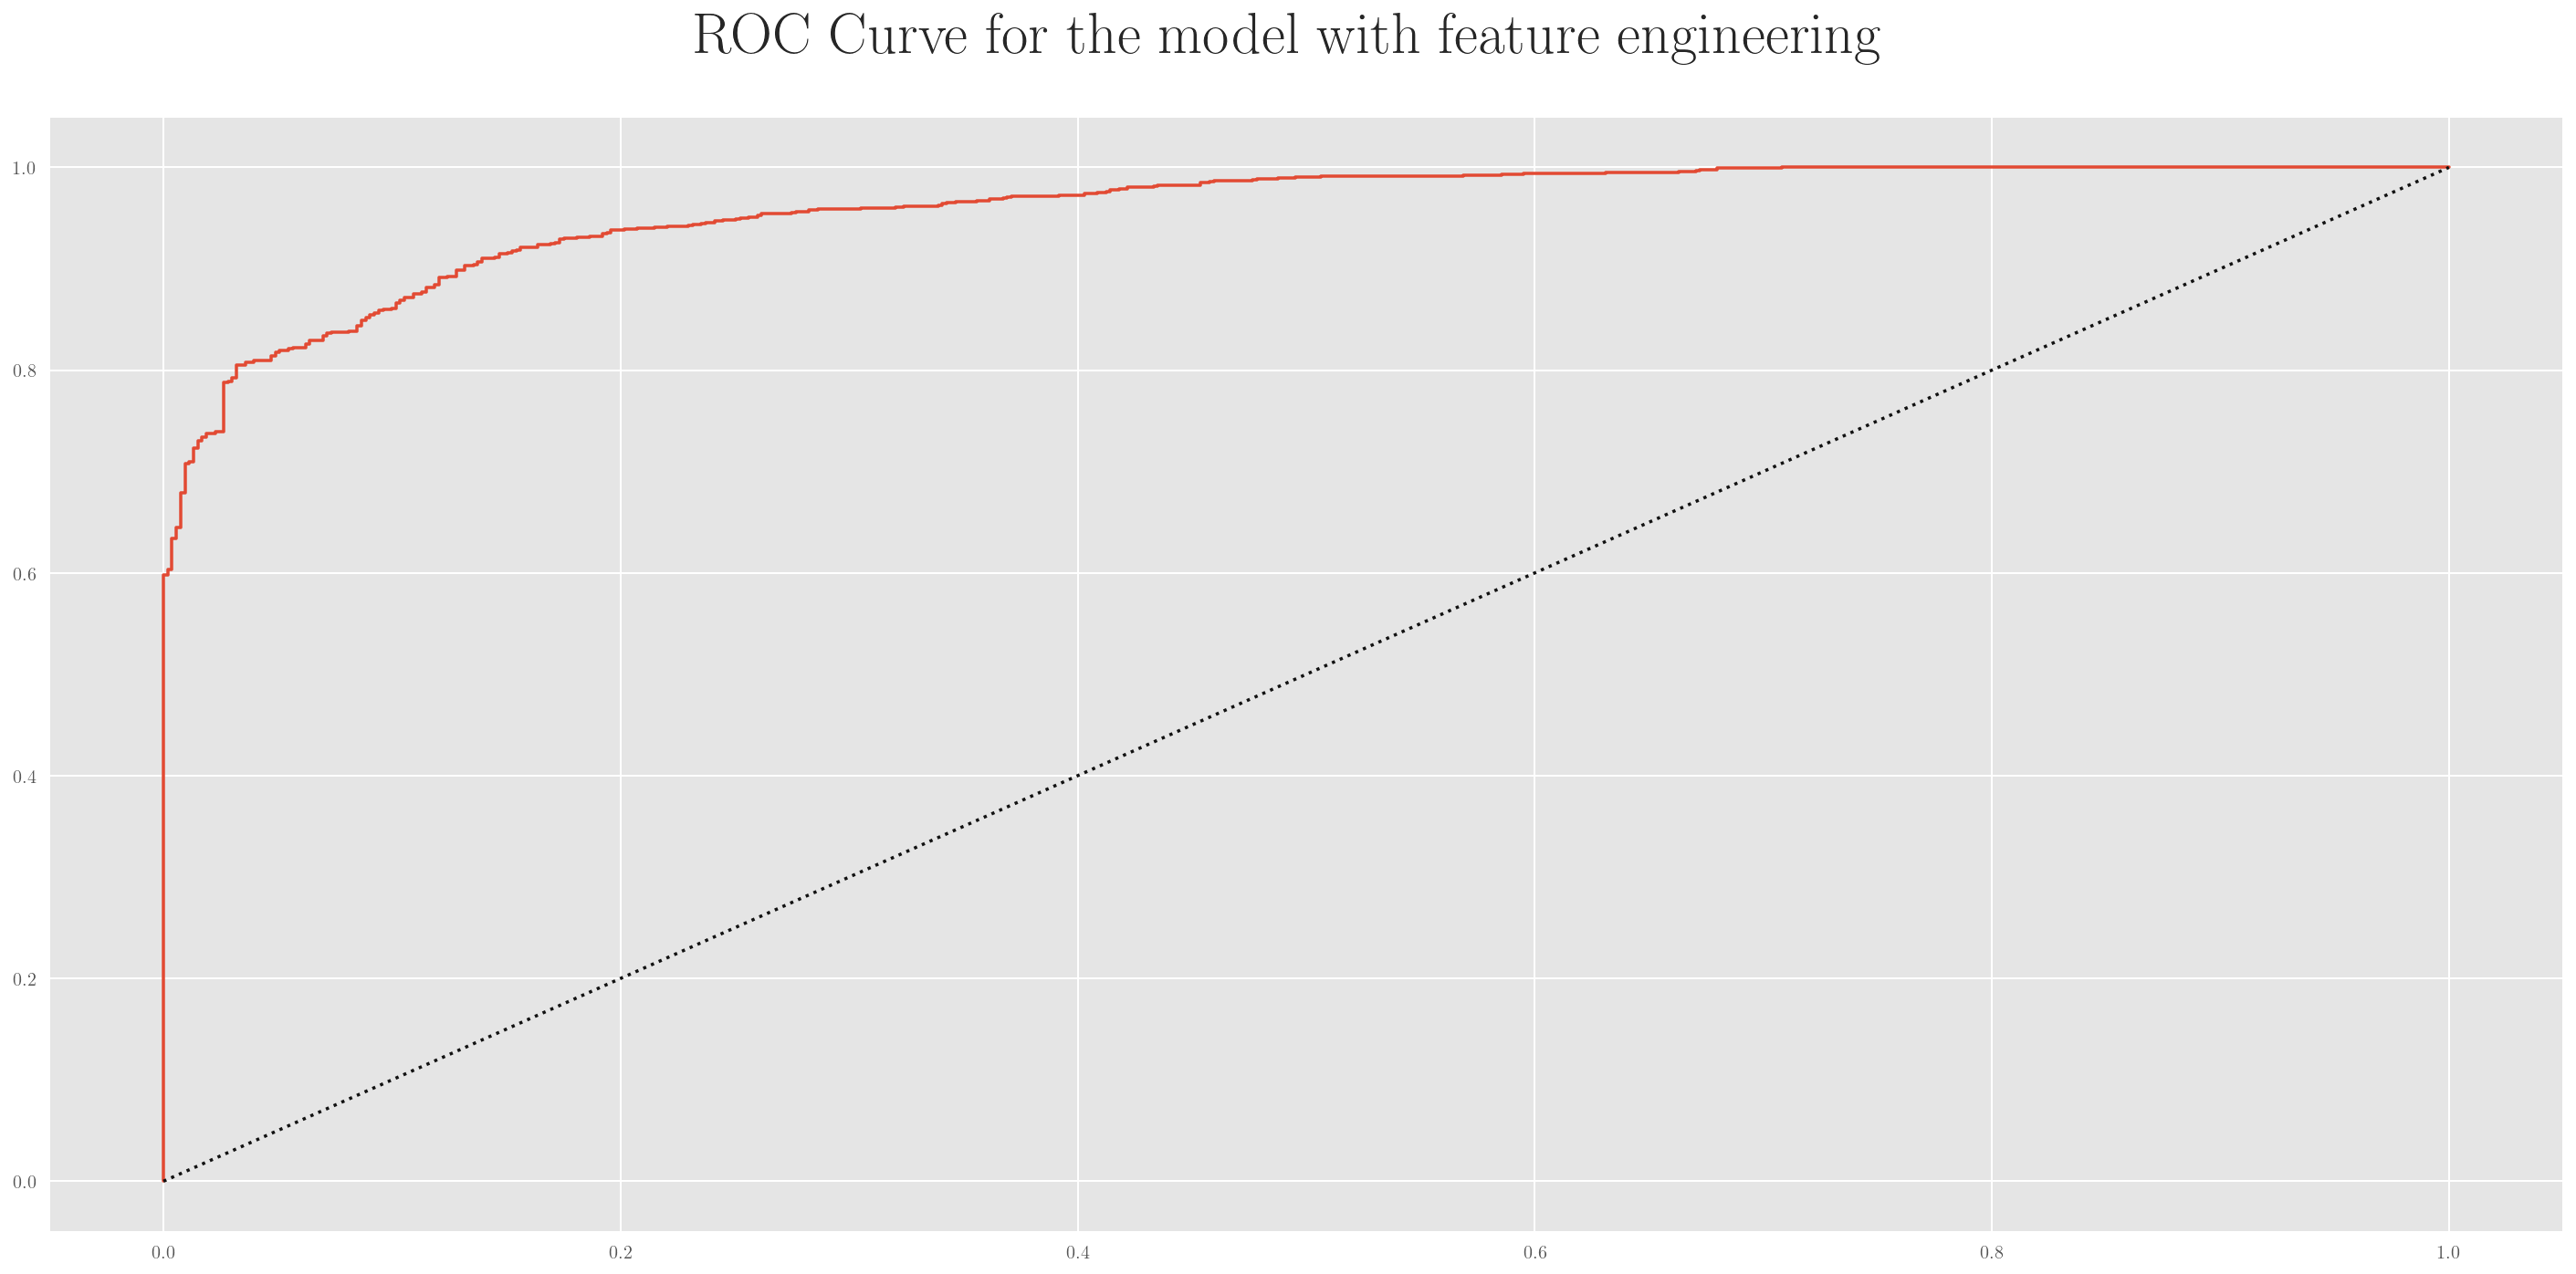

In [29]:

visualizer = ROCAUC(clf, classes=['0.0', '1.0'], binary=True)

visualizer.fit(X_clf_train, y_clf_train)        # Fit the training data to the visualizer
visualizer.score(X_clf_test, y_clf_test)        # Evaluate the model on the test data
plt.suptitle('ROC Curve for the model with feature engineering', fontsize=32)
plt.tight_layout()

#### Class Prediction Errors Plot

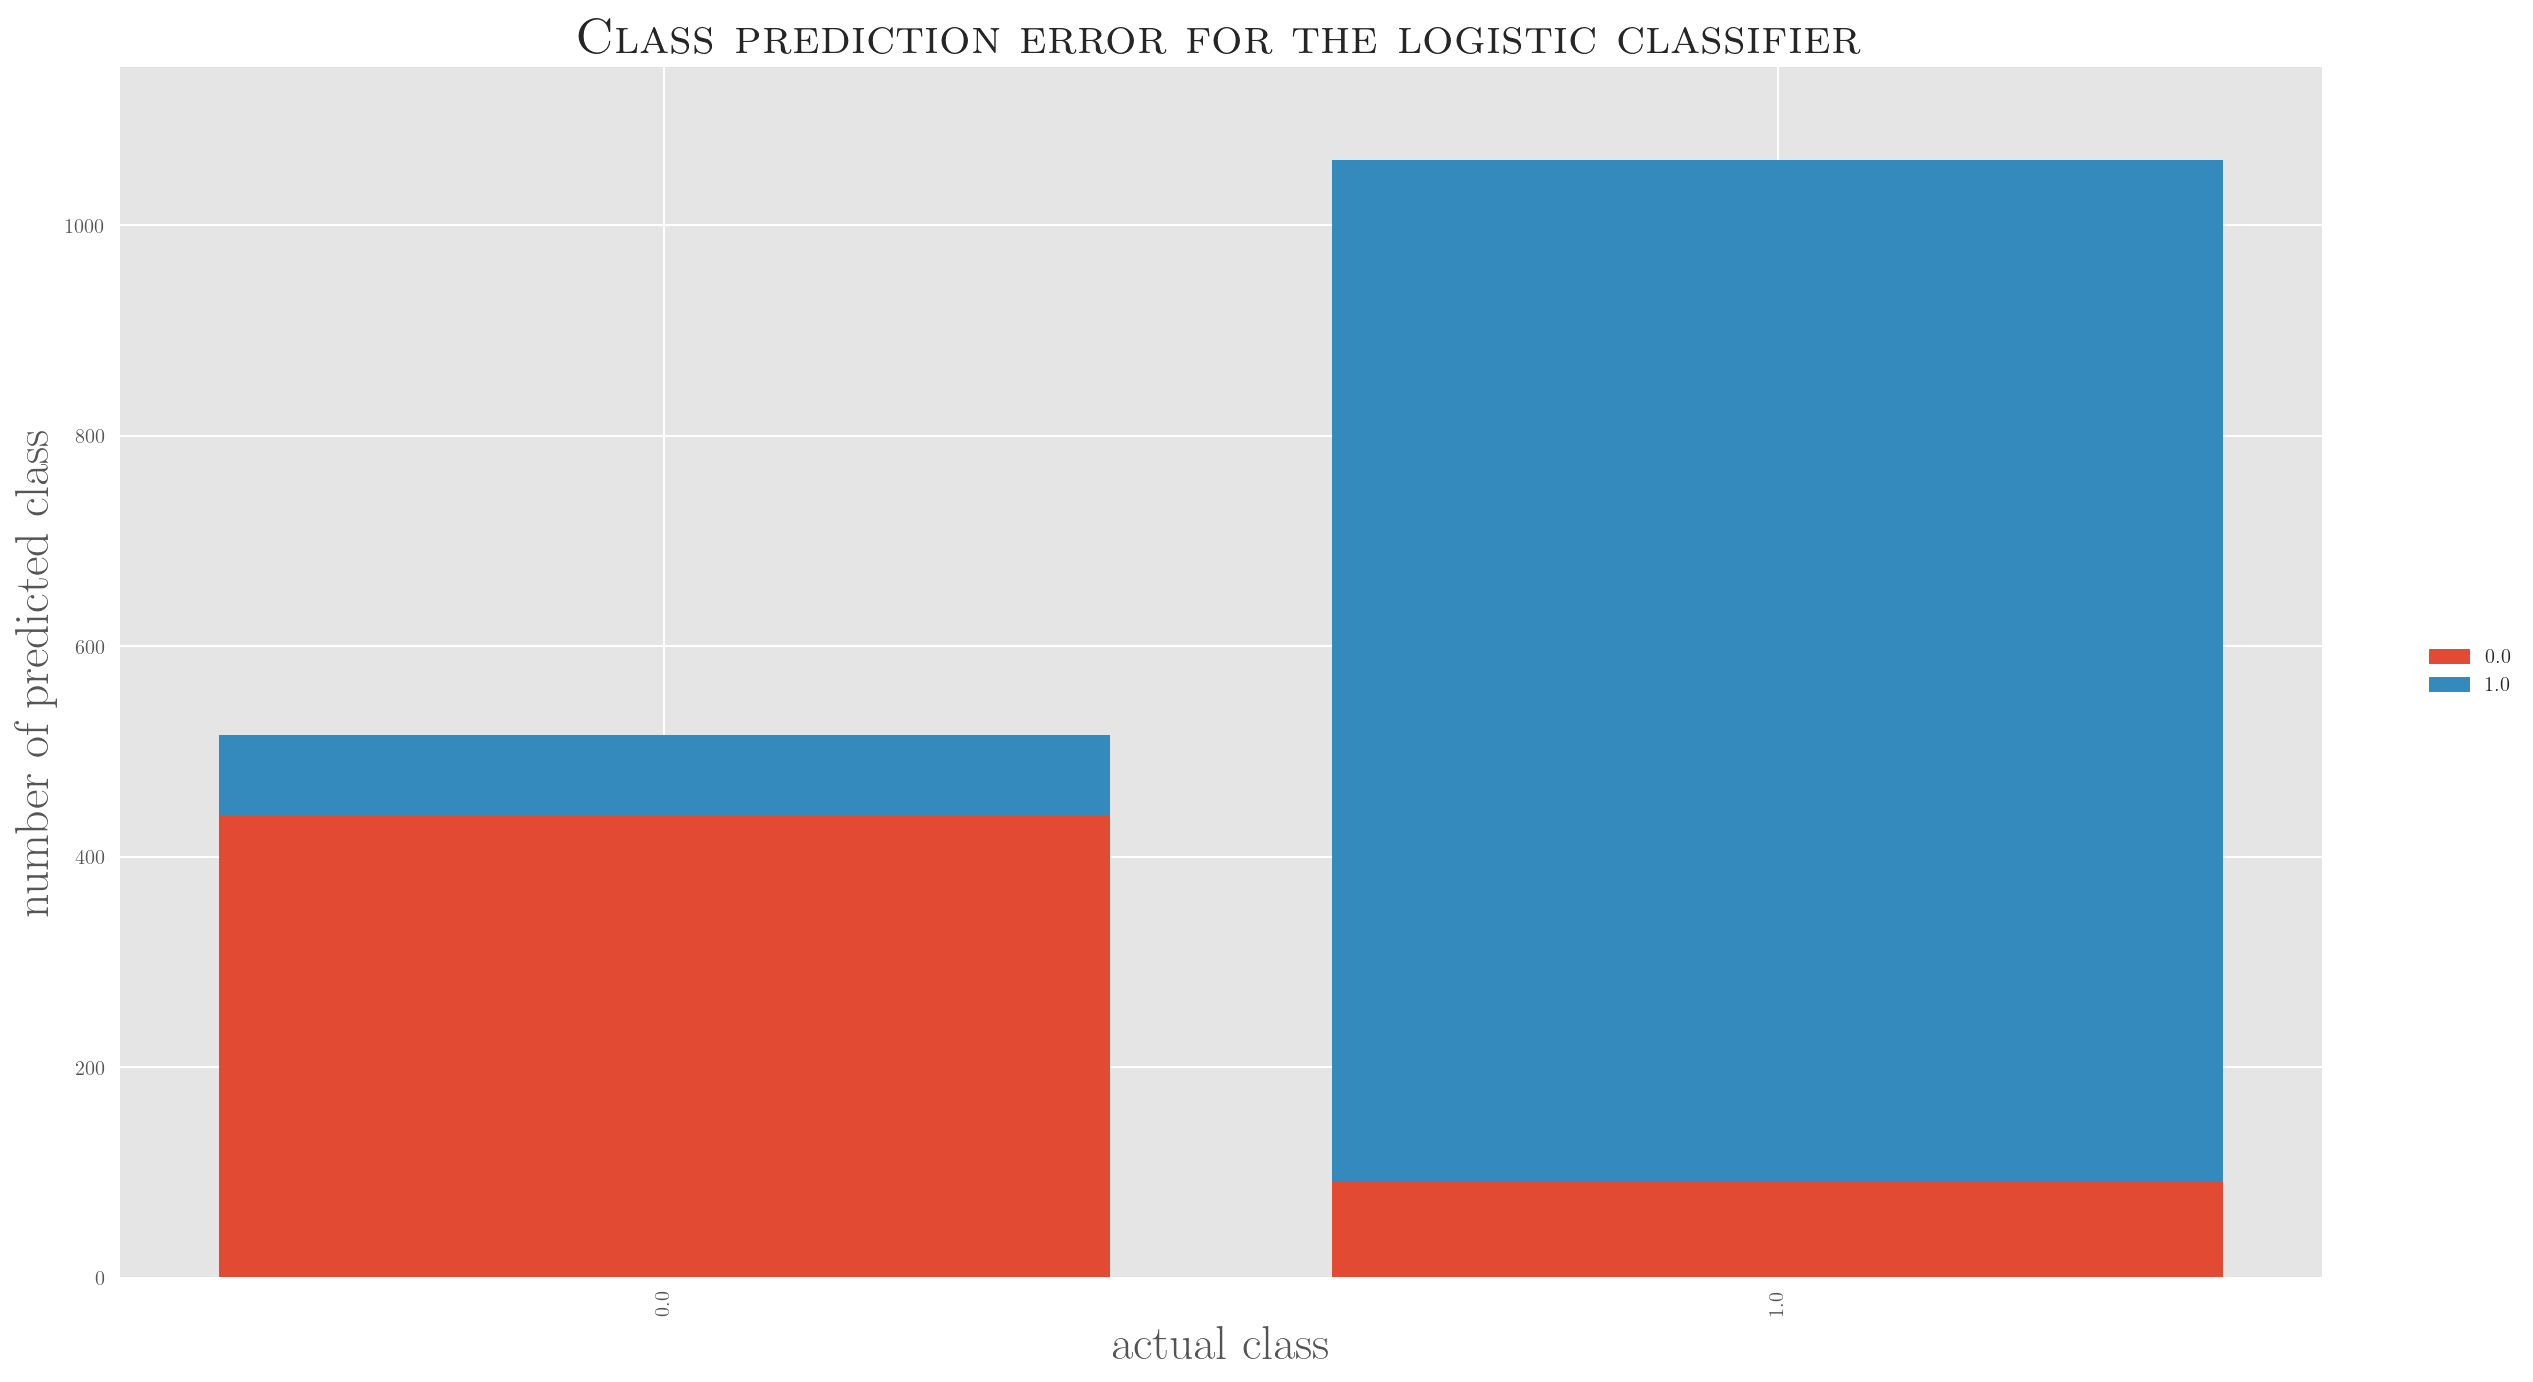

In [30]:
from yellowbrick.classifier import class_prediction_error
class_prediction_error(clf, X_clf_train, y_clf_train, X_test=X_clf_test, y_test=y_clf_test, classes=['0.0', '1.0'],                       title=r'\textsc{\Huge Class prediction error for the logistic classifier}',);